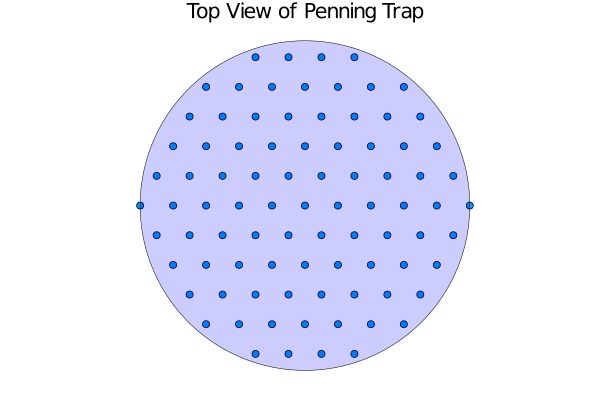

In [1]:
interionic_spacing = .1
up_modifier = sqrt(3)/2 * interionic_spacing
over_modifer = 1/2 * interionic_spacing
points_inside_circle = []
digits = 2
radius = .5
function gen_points(pt, points_inside_circle, x, y)
    pt = [round(pt[1], digits=digits), round(pt[2], digits=digits)]
    if pt in points_inside_circle || pt[1]^2 + pt[2]^2 > radius^2
        return
    else
        push!(points_inside_circle, pt)
        push!(x, pt[1])
        push!(y, pt[2])
        gen_points([pt[1] + over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] - interionic_spacing, pt[2]], points_inside_circle, x, y)
        return points_inside_circle, x, y
    end
end
pairs, x, y = gen_points([0, 0], [], [], [])
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end
using Plots
gr() # We will continue onward using the GR backend
plot(x, y, seriestype = :scatter, title = "Top View of Penning Trap")
plot!(circleShape(0, 0, .5), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none)

In [2]:
# z = []
# for (i, xx) in enumerate(x)
#     if y[i] == 0
#         yy = y[i]
#         data = read("sim_ell_gauss_30/infid$xx,$yy.csv", String)
#         push!(z, data)
#     end
# end
# infid = [el[1] for el in [[parse(Float64, s) for s in split(zz, "\n")[1:end-1]] for zz in z]]

In [3]:
# plot(infid)

In [4]:
# for [replace(zz, "\n"=>",")[1:end-1] for zz in z]

In [5]:
# z = []
# for (i, xx) in enumerate(x)
#     if y[i] == 0
#         yy = y[i]
#         data = read("sim_ell_gauss_30/gauss$xx,$yy.csv", String)
#         push!(z, data)
#     end
# end
# gauss = [[parse(Complex{Float64}, ss) for ss in split(s, ',')[1:end-1]] for s in [replace(zz, "\n"=>",") for zz in z]]

In [6]:
#maximum(z)

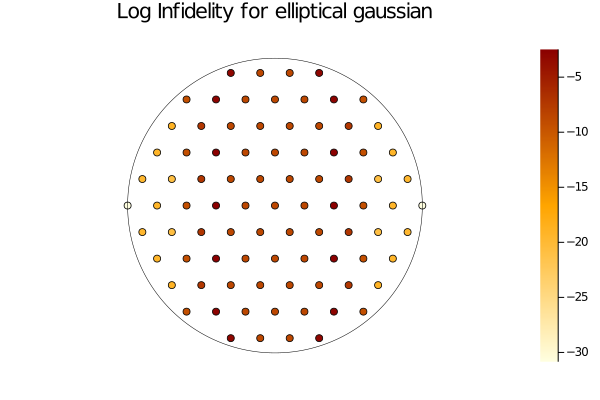

In [7]:
z = []
for (i, xx) in enumerate(x)
    yy = y[i]
    data = read("sim_ell_gauss_30/infid$xx,$yy.csv", String)
    push!(z, data)
end
z = [el[1] for el in [[parse(Float64, s) for s in split(zz, "\n")[1:end-1]] for zz in z]]
using Plots
scatter(x, y, marker_z = log.(abs.(z)),  c = :heat)
plot!(circleShape(0, 0, .5), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title="Log Infidelity for elliptical gaussian")

In [8]:
maximum(z)

0.08399658287072553

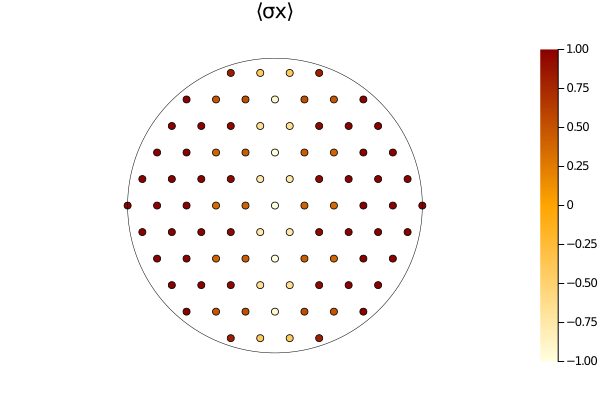

In [9]:
z = []
for (i, xx) in enumerate(x)
    yy = y[i]
    data = read("sim_ell_gauss_30/seq$xx,$yy.csv", String)
    push!(z, data)
end
seq = [[parse(Complex{Float64}, ss) for ss in split(s, ',')[1:end-1]] for s in [replace(zz, "\n"=>",") for zz in z]]
zseq = [real(adjoint(s) * [0, 1, 1, 0]) for s in seq]
scatter(x, y, marker_z = zseq,  c = :heat)
plot!(circleShape(0, 0, .5), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title="⟨σx⟩")

In [10]:
minimum(zseq)

-1.0014587990681088

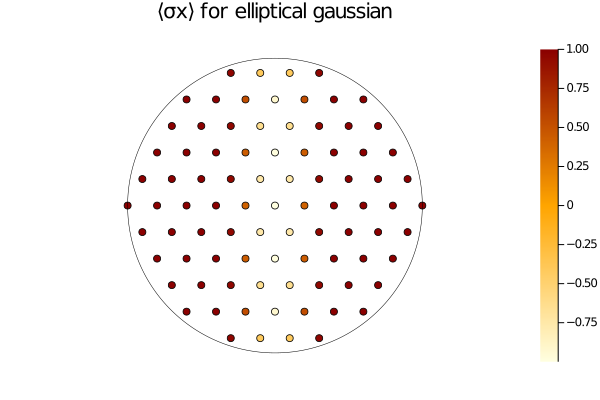

In [11]:
z = []
for (i, xx) in enumerate(x)
    yy = y[i]
    data = read("sim_ell_gauss_30/gauss$xx,$yy.csv", String)
    push!(z, data)
end
gauss = [[parse(Complex{Float64}, ss) for ss in split(s, ',')[1:end-1]] for s in [replace(zz, "\n"=>",") for zz in z]]
zgauss = [real(adjoint(s) * [0, 1, 1, 0]) for s in gauss]
scatter(x, y, marker_z = zgauss,  c = :heat)
plot!(circleShape(0, 0, .5), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title="⟨σx⟩ for elliptical gaussian")